# Clasificación de Notas Musicales Mediante Umbrales

### Jorge De Pablo Martínez | María Guadaño Nieto | Irene Rodríguez García 


## Introducción

El objetivo de esta práctica es que ante una entrada (un fichero de audio con una nota aislada), te devuelva que nota es y a que octava pertenece.

Para el funcionamiento de nuestra práctica se necesitan: 
* Fichero en formato .json que contiene las frecuencias fundamentales de las notas de la primera octava.
* Módulos de de python tds_utils.py y thresholds.py. 
* Archivos de audio que usaremos para nuestra matriz test para comprobar el correcto funcionamiento.
* Archivo de audio del que se quiere obtener la nota (entrada).

## 1 
En este primer bloque formamos las estructuras de datos principales, todos los imports, y las variables que usaremos a lo largo de la práctica como los umbrales y la nota a analizar,

In [18]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wf
#import wavfile as wf
import scipy.signal as ss
import sounddevice as sd
import spectrum

import thresholds
import tds_utils

FILE = "src/notes.json"
OCTAVES_NUM = 8
TH_MIN = 25
TH_MAX = 7500
NOTES = ['Do', 'Re', 'Mi', 'Fa', 'Sol', 'La', 'Si']
# Hay que estudiar la posibilidad de poder meter los sostenidos y bemoles, cuando funciones la primera versión 

thresholds = thresholds.get_thresholds(NOTES, FILE, OCTAVES_NUM, TH_MIN) 
# obtengo los umbrales con el script de python que me hice

# esto es una traza
print(thresholds)
# lo que imprime, el primer número es el umbral por abajo y el segundo la fc(teórica) de cada nota. 
# de manera que si la frecuencia que sacamos esta por encima del umbral por abajo de una nota (re) 
# y por debajo del umbral por abajo de la siguiente (mi) es un Re la nota

note = 'A_la430'
filename = ('src/notes/' + note + '.wav')



[{'Do': (25, 32.703), 'Re': (34.71, 36.708), 'Mi': (38.96, 41.203), 'Fa': (42.43, 43.654), 'Sol': (46.33, 48.999), 'La': (52.0, 55.0), 'Si': (58.37, 61.735)}, {'Do': (63.57, 65.406), 'Re': (69.41, 73.416), 'Mi': (77.91, 82.406), 'Fa': (84.86, 87.308), 'Sol': (92.65, 97.998), 'La': (104.0, 110.0), 'Si': (116.73, 123.47)}, {'Do': (127.14, 130.812), 'Re': (138.82, 146.832), 'Mi': (155.82, 164.812), 'Fa': (169.71, 174.616), 'Sol': (185.31, 195.996), 'La': (208.0, 220.0), 'Si': (233.47, 246.94)}, {'Do': (254.28, 261.624), 'Re': (277.64, 293.664), 'Mi': (311.64, 329.624), 'Fa': (339.43, 349.232), 'Sol': (370.61, 391.992), 'La': (416.0, 440.0), 'Si': (466.94, 493.88)}, {'Do': (508.56, 523.248), 'Re': (555.29, 587.328), 'Mi': (623.29, 659.248), 'Fa': (678.86, 698.464), 'Sol': (741.22, 783.984), 'La': (831.99, 880.0), 'Si': (933.88, 987.76)}, {'Do': (1017.13, 1046.496), 'Re': (1110.58, 1174.656), 'Mi': (1246.58, 1318.496), 'Fa': (1357.71, 1396.928), 'Sol': (1482.45, 1567.968), 'La': (1663.98, 1

## 2 
Ahora formamos nuestra matriz test, pasamos el algoritmo principal a las notas de la matriz test y contrastamos los resultados con el objetivo de validar el algoritmo. 

In [19]:
# Hay que hacer una matriz test. 

# Se le pone en una columna nombre de la nota, en la segunda la nota.wav
# al mneos con 10 notas diferentes 

# se pasa el algoritmo principal (que no tenemos) a cada nota y se va creando la matriz results 
# si la primera columna de la matriz test es igual que la matriz results el algoritmo funciona




## 3 
Obtenemos el las característica de la señal principal y formamos el eje de tiempo para poder representar la señal y el espectro. 

<IPython.core.display.Javascript object>


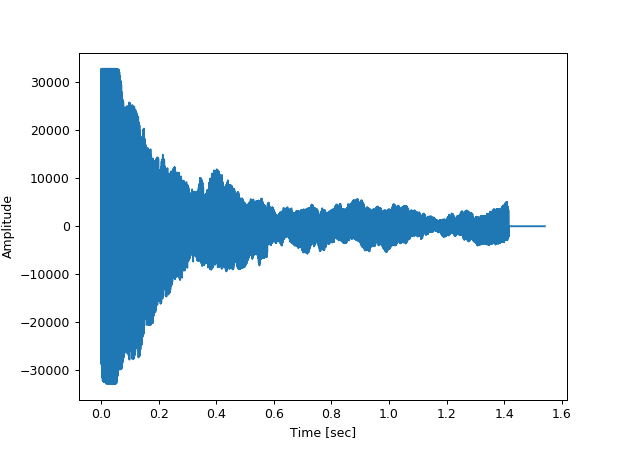

Text(0, 0.5, 'Amplitude')

In [20]:
fs,y = wf.read(filename)

# falla en mi ordenador de la uni, probar en casa 
#sd.play(y,fs)

# modifico la señal de audio para quedarnos con lo que nos interesa 
# creo el vector para poder representarlo (el eje)
if len(y.shape) > 1:
    y = y[:,0]

t = np.arange(0,len(y))/fs

# para representar
plt.figure(figsize = (7,5))
plt.plot(t, y)
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')

# en realidad es solo para representar esta mierda no vale para nada pero queda bonito

<IPython.core.display.Javascript object>


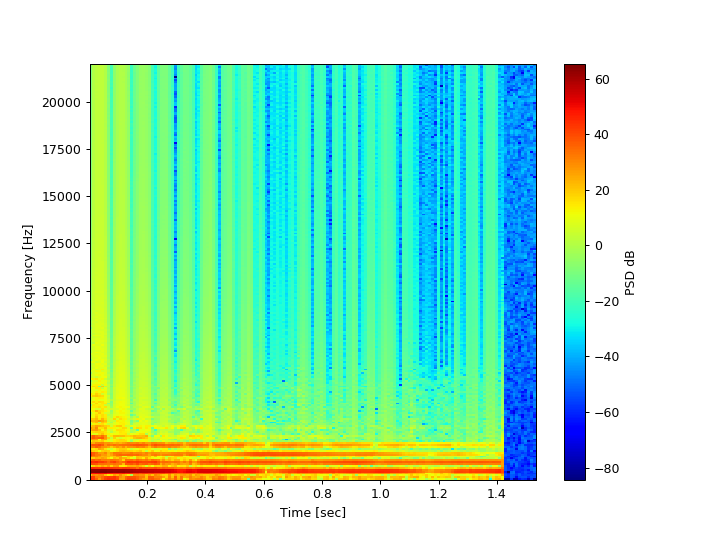

In [21]:
# resolución del espectograma en banda ancha 
# lo he cogido de la practica 5, en realidad no sirve para nada pero ahí esta molan los colorcitos
N = int(0.010*fs)
tds_utils.my_spectrogram(y,N,fs)

## 4 
Enventanamos la señal, obtenemos la densidad espectral de la señal con tds_utils, representamos el espectro y obtenemos la frecuencia fundamental a a partir de este. 

<IPython.core.display.Javascript object>


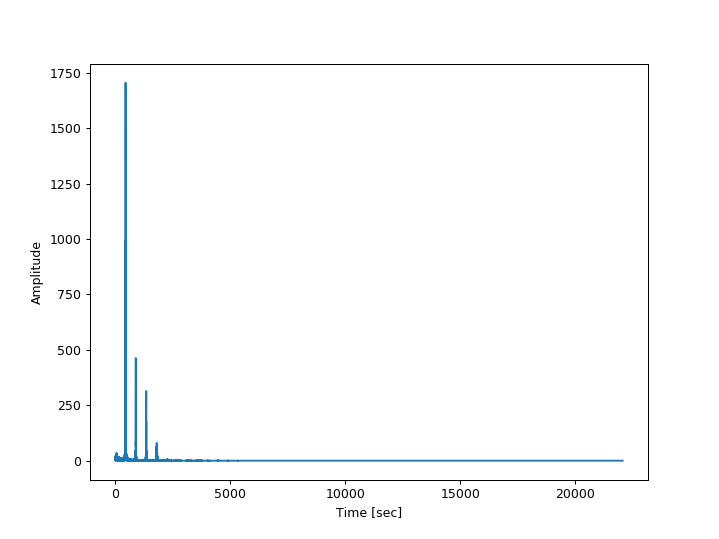

442.94471740722656


In [30]:
# enventanamiento y representar, el primer pico es la frecuencia de la nota
# he decidido no enventanar
s = y

psd,f = tds_utils.my_spectra(s,fs)

idx = f >= 0
plt.figure(figsize=(8,6))
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude') # esto no es time y amplitude, saber que arroja my_espectra

plt.plot(f[idx],psd[idx])

# la funcion find_peaks me la recomendó Rebeca en clase pero no se como funciona,
# se supone que se le pasa una señal (el espectro que devuelve my_spectra ?? )
# y te devuelve los picos, creo que el primero es la nota y los demás los ármonicos 
# será el más alto la nota y no los armónicos ?? 
n = ss.find_peaks(psd)
#rint(n1)

peak = np.argmax(psd)
fc = abs(f[peak])
print(fc)

## 5 
Comparo la frecuencia de la nota con mi diccionario de umbrales que me he creado al principio. 
Primero decidimos en que umbral está la nota (margen más amplio) y depues nos recorremos los umbrales de esa octava para clasificarla mediante dos umbrales. 

In [38]:
i = 0
while i <= len(thresholds) - 1: 
    if fc > thresholds[i]['Do'][0] and fc < thresholds[i+1]['Do'][0]:
        octave = i + 1
        break
    else: 
        i += 1

for note in NOTES:
    th_inf = thresholds[i][note][0]
    if fc > th_inf and note != 'Si':
        note_ant = note
    elif fc > th_inf and note == 'Si':
        print(str(round(fc, 2)) + ' Es un ' + note + ' octava ' + str(octave))
    else: 
        print(str(round(fc, 2)) + ' Es un ' + note_ant + ' octava ' + str(octave))
        break


442.94 Es un La octava 4
